In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
FILE_PATH = 'listings.csv.gz'

try:
    # Veri setini Pandas DataFrame olarak yükleme
    df = pd.read_csv(FILE_PATH)
    print(f"'{FILE_PATH}' dosyası başarıyla yüklendi. Satır sayısı: {len(df)}")
    print("\nİlk 5 Satır:")
    print(df.head())
    print("\nVeri Tipleri (Özet):")
    print(df.info(verbose=False))

except FileNotFoundError:
    print(f"HATA: '{FILE_PATH}' dosyası bulunamadı")

'listings.csv.gz' dosyası başarıyla yüklendi. Satır sayısı: 29637

İlk 5 Satır:
      id                         listing_url       scrape_id last_scraped  \
0  25436  https://www.airbnb.com/rooms/25436  20250627144659   2025-06-28   
1  34177  https://www.airbnb.com/rooms/34177  20250627144659   2025-07-01   
2  42835  https://www.airbnb.com/rooms/42835  20250627144659   2025-06-28   
3  73477  https://www.airbnb.com/rooms/73477  20250627144659   2025-07-01   
4  77292  https://www.airbnb.com/rooms/77292  20250627144659   2025-06-30   

            source                                              name  \
0  previous scrape   In the forest Sea view Two minutes to the city.   
1      city scrape                                       PETIT HOUSE   
2  previous scrape           Cozy apartment in the heart of Istanbul   
3      city scrape  Sea View Apartment in Taksim/ Center of Istanbul   
4  previous scrape   3 Bedroom Apartment with Terrace Bosphorus View   

                        

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29637 entries, 0 to 29636
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            29637 non-null  int64  
 1   listing_url                                   29637 non-null  object 
 2   scrape_id                                     29637 non-null  int64  
 3   last_scraped                                  29637 non-null  object 
 4   source                                        29637 non-null  object 
 5   name                                          29637 non-null  object 
 6   description                                   28831 non-null  object 
 7   neighborhood_overview                         8335 non-null   object 
 8   picture_url                                   29637 non-null  object 
 9   host_id                                       29637 non-null 

In [3]:
# price'ı sade sayısal tipe dönüştür
# dönüştürülemeyen(coerce) değerleri NaN yap.
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Fiyatı kontrol et (Bazı Airbnb verilerinde fiyat günlük değil, aylık olabilir).
# Analizin güvenilirliği için aşırı yüksek fiyatları elemek faydalıdır.
max_price_threshold = 10000
df_cleaned = df[df['price'] < max_price_threshold]

print("--- Fiyat Temizleme ve Filtreleme Sonucu ---")
print(f"Başlangıç satır sayısı: {len(df)}")
print(f"Fiyatı temizleme ve aykırı değerleri (>{max_price_threshold}) çıkarma sonrası kalan satır: {len(df_cleaned)}")
print(f"Yeni ortalama fiyat: {df_cleaned['price'].mean():.2f}")

--- Fiyat Temizleme ve Filtreleme Sonucu ---
Başlangıç satır sayısı: 29637
Fiyatı temizleme ve aykırı değerleri (>10000) çıkarma sonrası kalan satır: 24336
Yeni ortalama fiyat: 2811.16


In [4]:
# Analiz için 3 kritik olan sütundaki eksiği olan satırları çıkaralım.
df_cleaned = df_cleaned.dropna(subset=['bedrooms', 'bathrooms_text', 'price'])

print("\n--- Eksik Değer Temizleme Sonucu ---")
print(f"Tüm kritik sütunlar temizlendikten sonra kalan satır sayısı: {len(df_cleaned)}")


--- Eksik Değer Temizleme Sonucu ---
Tüm kritik sütunlar temizlendikten sonra kalan satır sayısı: 24105


In [5]:
# Analiz için gerekli sütunları seçelim
core_columns = [
    'neighbourhood_cleansed', # Mahalle
    'room_type',              # Oda Tipi
    'price',                  # Fiyat (Hedefimiz)
    'minimum_nights',         # Minimum Gece Sayısı
    'number_of_reviews',      # Yorum Sayısı (Popülerlik)
    'latitude',               # Enlem (Harita)
    'longitude',              # Boylam (Harita)
    'accommodates',           # Kaç Kişilik Olduğu
    'bedrooms',               # Yatak Odası Sayısı
    'host_is_superhost'       # Süper Ev Sahibi mi?
]

df_final = df_cleaned[core_columns].copy()

print("\n--- Analiz için Hazır Veri Seti ---")
print(f"Son satır sayısı: {len(df_final)}")
print(df_final.head())


--- Analiz için Hazır Veri Seti ---
Son satır sayısı: 24105
  neighbourhood_cleansed        room_type   price  minimum_nights  \
1               Besiktas  Entire home/apt  1794.0             100   
3                Beyoglu  Entire home/apt  2331.0             100   
5                Beyoglu  Entire home/apt  4984.0             100   
6                Beyoglu     Private room  1668.0             100   
7                  Sisli     Private room  1507.0             100   

   number_of_reviews   latitude  longitude  accommodates  bedrooms  \
1                 16  41.066810  29.040350             3       1.0   
3                 11  41.034447  28.987555             2       1.0   
5                112  41.033190  28.980710             4       2.0   
6                 93  41.029370  28.980440             1       1.0   
7                  1  41.057390  28.995500             2       1.0   

  host_is_superhost  
1                 f  
3                 t  
5                 f  
6              

In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24105 entries, 1 to 29636
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  24105 non-null  object 
 1   room_type               24105 non-null  object 
 2   price                   24105 non-null  float64
 3   minimum_nights          24105 non-null  int64  
 4   number_of_reviews       24105 non-null  int64  
 5   latitude                24105 non-null  float64
 6   longitude               24105 non-null  float64
 7   accommodates            24105 non-null  int64  
 8   bedrooms                24105 non-null  float64
 9   host_is_superhost       23592 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 2.0+ MB


In [8]:
# Sadece host_is_superhost sütununda NaN olan satırları çıkaralım
df_final = df_final.dropna(subset=['host_is_superhost'])

print("\n--- Süper Ev Sahibi Eksik Değerleri Temizlendi ---")
print(f"Yeni satır sayısı: {len(df_final)}")
print(df_final.info())


--- Süper Ev Sahibi Eksik Değerleri Temizlendi ---
Yeni satır sayısı: 23592
<class 'pandas.core.frame.DataFrame'>
Index: 23592 entries, 1 to 29636
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  23592 non-null  object 
 1   room_type               23592 non-null  object 
 2   price                   23592 non-null  float64
 3   minimum_nights          23592 non-null  int64  
 4   number_of_reviews       23592 non-null  int64  
 5   latitude                23592 non-null  float64
 6   longitude               23592 non-null  float64
 7   accommodates            23592 non-null  int64  
 8   bedrooms                23592 non-null  float64
 9   host_is_superhost       23592 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 2.0+ MB
None


In [9]:
print("\n--- Temizlenmiş Fiyatın İstatistikleri ---")
print(df_final['price'].describe())


--- Temizlenmiş Fiyatın İstatistikleri ---
count    23592.000000
mean      2808.054213
std       1851.568705
min         80.000000
25%       1512.000000
50%       2348.000000
75%       3588.000000
max       9999.000000
Name: price, dtype: float64



--- Oda Tiplerine Göre Ortalama Fiyat (Sıralı) ---
                        mean  median  count
room_type                                  
Entire home/apt  3181.304856  2685.0  16785
Hotel room       2115.558559  1991.0    111
Private room     1885.288912  1497.0   6656
Shared room      1652.575000  1205.5     40


/tmp/ipython-input-4181317935.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_price.index, y=room_type_price['mean'], palette='viridis')


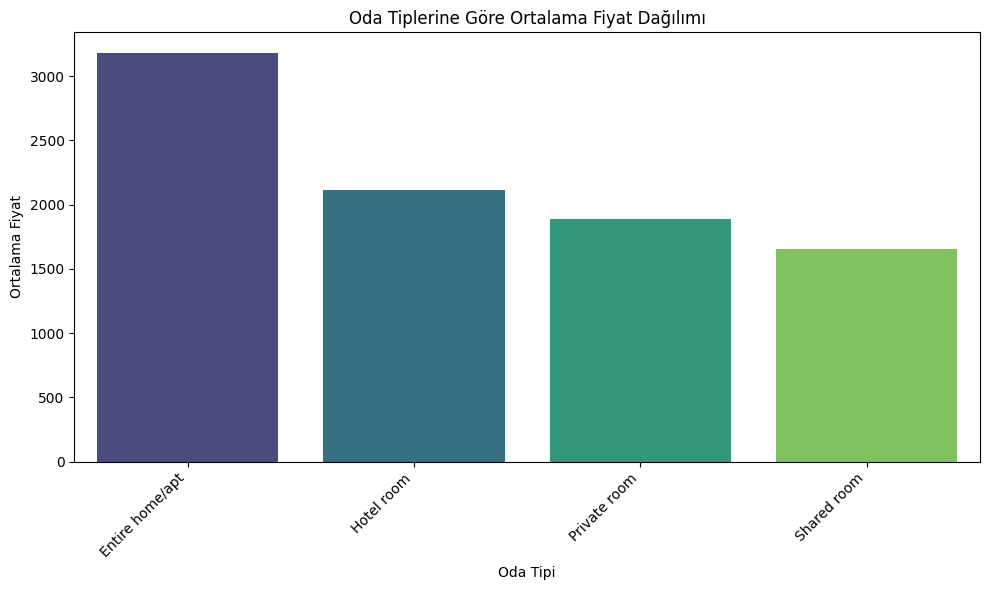

In [14]:
room_type_price = df_final.groupby('room_type')['price'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

print("\n--- Oda Tiplerine Göre Ortalama Fiyat (Sıralı) ---")
print(room_type_price)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_price.index, y=room_type_price['mean'], palette='viridis')
plt.title('Oda Tiplerine Göre Ortalama Fiyat Dağılımı')
plt.xlabel('Oda Tipi')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# 'host_is_superhost' sütununu True/False (Boolean) formata dönüştürelim
df_final['is_superhost'] = df_final['host_is_superhost'].map({'t': True, 'f': False})

# Süper Ev Sahibi statüsüne göre ortalama fiyat ve yorum sayısını hesapla
superhost_analysis = df_final.groupby('is_superhost').agg(
    ortalama_fiyat=('price', 'mean'),
    ortalama_yorum_sayisi=('number_of_reviews', 'mean'),
    ilan_sayisi=('price', 'count')
).reset_index()

print("\n--- 1. Süper Ev Sahibi Analizi ---")
print(superhost_analysis.round(2))


--- 1. Süper Ev Sahibi Analizi ---
   is_superhost  ortalama_fiyat  ortalama_yorum_sayisi  ilan_sayisi
0         False         2654.51                  12.49        18183
1          True         3324.22                  39.54         5409


/tmp/ipython-input-844754552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['is_superhost'] = df_final['host_is_superhost'].map({'t': True, 'f': False})



--- 2. En Pahalı 10 Mahalle (Ortalama Fiyata Göre) ---
neighbourhood_cleansed
Sile           4281.67
Adalar         4227.52
Silivri        4006.19
Zeytinburnu    3602.15
Catalca        3579.64
Basaksehir     3558.99
Sariyer        3337.62
Beylikduzu     3252.06
Sisli          3181.19
Bakirkoy       3169.72
Name: price, dtype: float64


/tmp/ipython-input-255031714.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_neighbourhoods.index, y=top_10_neighbourhoods.values, palette='plasma')


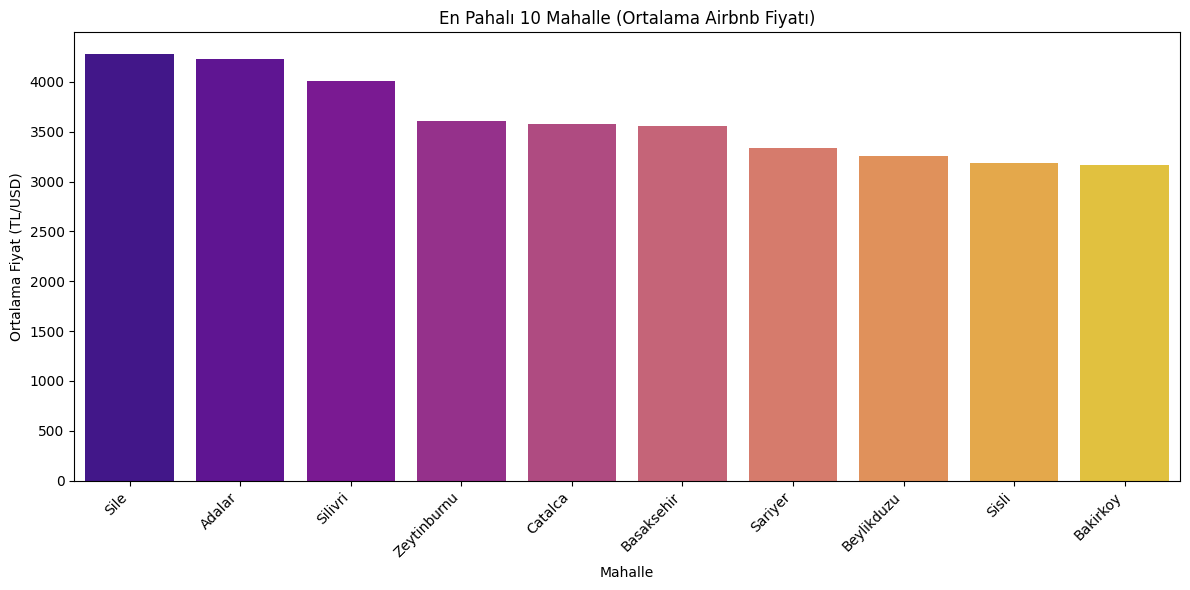

In [16]:
# Mahalleleri ortalama fiyata göre sıralayalım
neighbourhood_prices = df_final.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# En pahalı 10 mahalleyi listeleyelim
top_10_neighbourhoods = neighbourhood_prices.head(10)

print("\n--- 2. En Pahalı 10 Mahalle (Ortalama Fiyata Göre) ---")
print(top_10_neighbourhoods.round(2))

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_neighbourhoods.index, y=top_10_neighbourhoods.values, palette='plasma')
plt.title('En Pahalı 10 Mahalle (Ortalama Airbnb Fiyatı)')
plt.xlabel('Mahalle')
plt.ylabel('Ortalama Fiyat (TL/USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- 3. Harita Görseli Oluşturuluyor ---


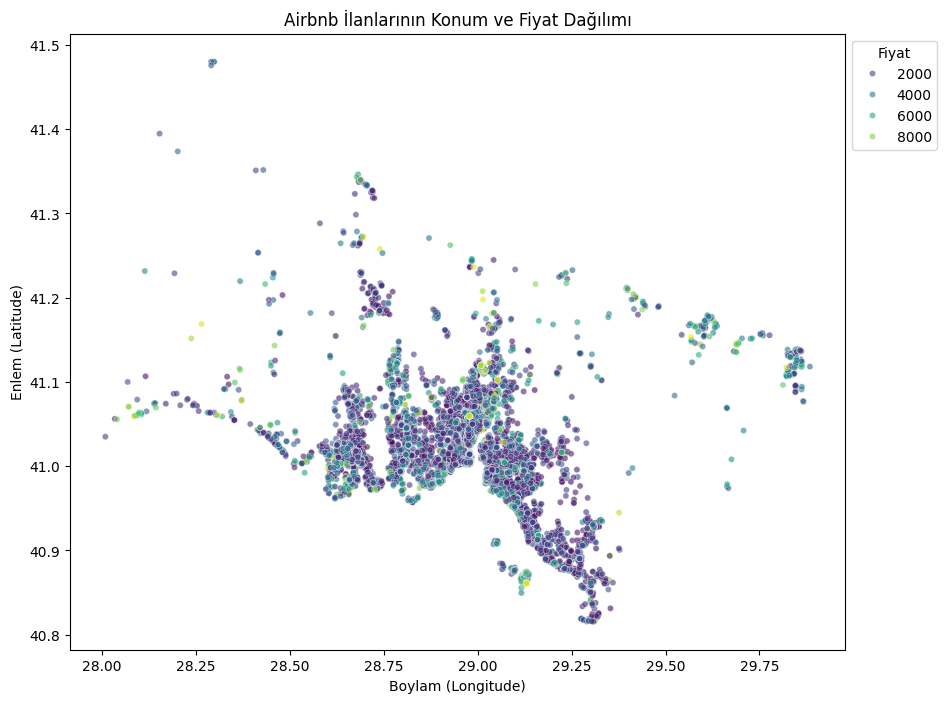

In [17]:
print("\n--- 3. Harita Görseli Oluşturuluyor ---")

plt.figure(figsize=(10, 8))
# Fiyatı renklendirerek hem konumu hem fiyatı aynı anda görelim
sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_final,
    hue='price',
    palette='viridis',
    s=20,  # Nokta boyutu
    alpha=0.6 # Şeffaflık
)
plt.title('Airbnb İlanlarının Konum ve Fiyat Dağılımı')
plt.xlabel('Boylam (Longitude)')
plt.ylabel('Enlem (Latitude)')
plt.legend(title='Fiyat', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()